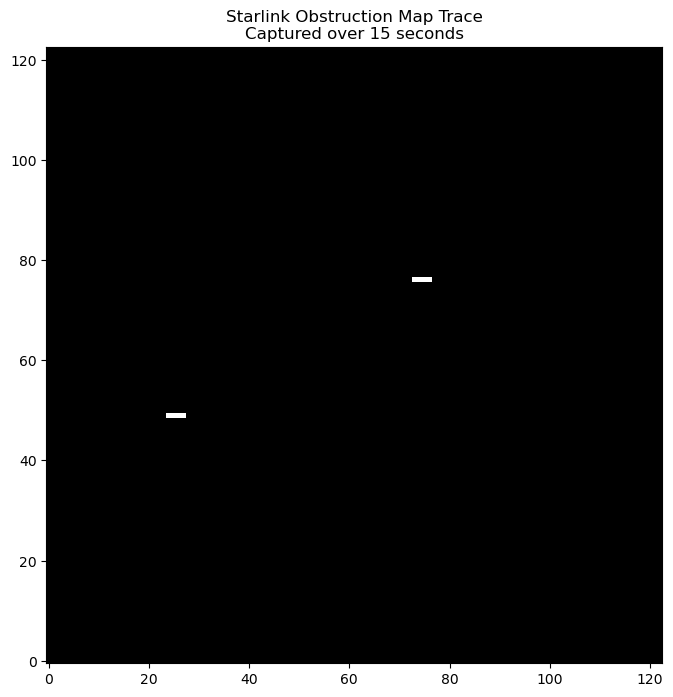

In [24]:
import sys
import os

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\SatInView/starlink-grpc-tools-main'))
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_trace(snapshots):
    plt.figure(figsize=(8, 8))
    base_image = np.zeros_like(snapshots[0])

    for snr_data in snapshots:
        base_image = np.maximum(base_image, snr_data)

    plt.imshow(base_image, cmap='gray', origin='lower')
    plt.title(f'Starlink Obstruction Map Trace\nCaptured over {duration_seconds} seconds')
    plt.show()

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target
starlink_grpc.reset_obstruction_map(context)
# Define the duration and interval for capturing the data
duration_seconds = 15
interval_seconds = 1  # Capture a snapshot every 1 second

# Capture the SNR data over the specified duration
snapshots = capture_snr_data(duration_seconds, interval_seconds, context)

# Plot the trace of the SNR data
plot_snr_trace(snapshots)

In [3]:
import sys
import os
import math
sys.path.append(os.path.abspath('E:\\SatInView\\starlink-grpc-tools-main'))
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path


def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_trace(snapshots, start_time, end_time):
    plt.figure(figsize=(8, 8))
    base_image = np.zeros_like(snapshots[0])

    for snr_data in snapshots:
        base_image = np.maximum(base_image, snr_data)

    plt.imshow(base_image, cmap='gray', origin='lower')
    plt.title(f'Starlink Obstruction Map Trace\nCaptured from {start_time} to {end_time} UTC')
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

# Wait until the current second matches one of the target times
wait_until_target_time()

starlink_grpc.reset_obstruction_map(context)

# Define the duration and interval for capturing the data
duration_seconds = 15
interval_seconds = 1  # Capture a snapshot every 1 second

# Capture the start time
start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

# Capture the SNR data over the specified duration
snapshots = capture_snr_data(duration_seconds, interval_seconds, context)

# Capture the end time
end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

# Plot the trace of the SNR data
plot_snr_trace(snapshots, start_time, end_time)


KeyboardInterrupt: 

In [2]:
import sys
import os
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path
sys.path.append(os.path.abspath('E:\\SatInView\\starlink-grpc-tools-main'))

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_traces(all_snapshots, start_times, end_times):
    plt.figure(figsize=(20, 20))
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(5, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []

for _ in range(10):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 14
    interval_seconds = 1  # Capture a snapshot every 1 second

    start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times)


ModuleNotFoundError: No module named 'starlink_grpc'

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('E:\SatInView/starlink-grpc-tools-main'))
import math
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time

# Add the path to starlink-grpc-tools-main to the system path

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def plot_snr_traces(all_snapshots, start_times, end_times):
    plt.figure(figsize=(30, 40))  # Increase the figure size for better resolution
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(5, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the main title
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []

for _ in range(10):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 14
    interval_seconds = 1  # Capture a snapshot every 1 second

    start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times)


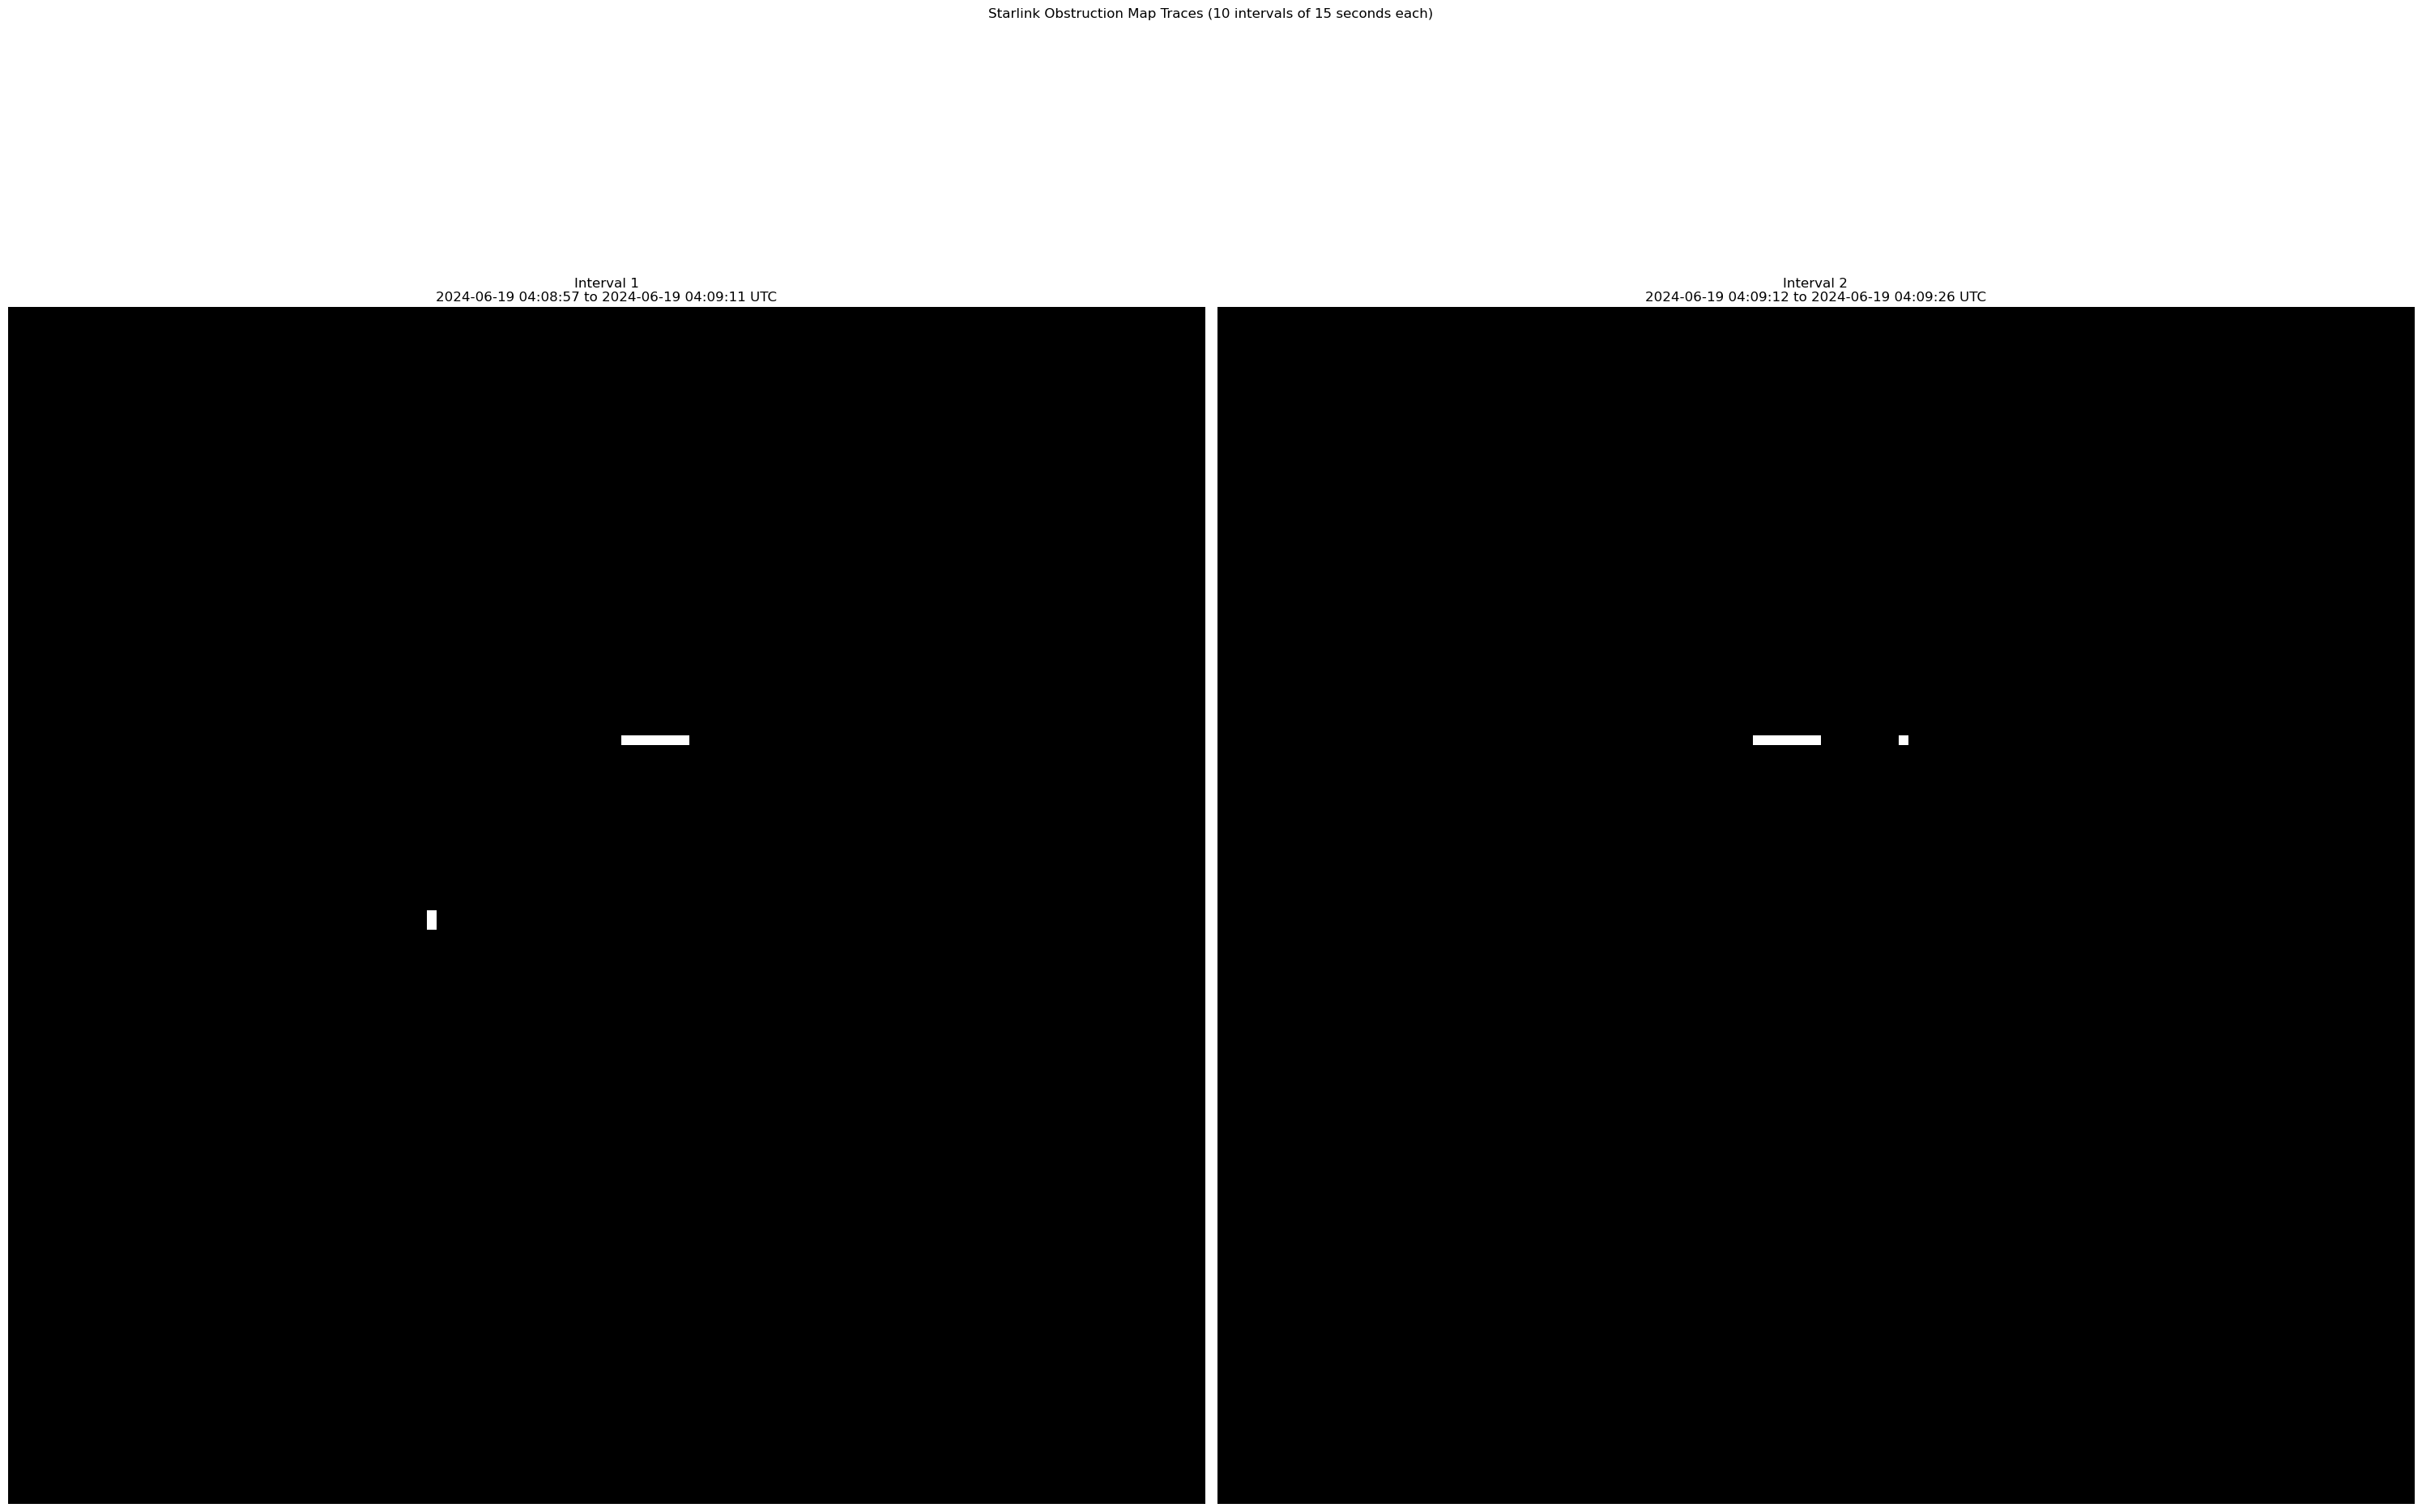

In [5]:
import sys
import os
import numpy as np
import time
import math
sys.path.append(os.path.abspath('E:/SatInView/starlink-grpc-tools-main'))

import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt

# Add the path to starlink-grpc-tools-main to the system path

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds
    time.sleep(0.5) 
    while time.time() < end_time:
        try:
            
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def save_white_pixel_coordinates(snapshots, start_time):
    white_pixel_coords = set()  # Use a set to store unique coordinates
    for snr_data in snapshots:
        coords = np.argwhere(snr_data == 1)
        for coord in coords:
            white_pixel_coords.add(tuple(coord))  # Add each coordinate as a tuple to the set

    with open('white_pixel_coordinates.txt', 'a') as f:
        f.write(f"{start_time}:\n")
        for coord in sorted(white_pixel_coords):  # Sort coordinates for consistency
            f.write(f"{coord}\n")
        f.write("\n")

def plot_snr_traces(all_snapshots, start_times, end_times,r):
    plt.figure(figsize=(30, 40))  # Increase the figure size for better resolution
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(r//2+1, 2, i + 1)  # Arrange plots in a 5x2 grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (10 intervals of 15 seconds each)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the main title
    plt.show()

def wait_until_target_time():
    target_seconds = {12, 27, 42, 57}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)  # Check every 0.5 seconds

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")  # Example target

all_snapshots = []
start_times = []
end_times = []
r=2
for _ in range(r):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 14
    interval_seconds = 1  # Capture a snapshot every 1 second

    start_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

    # Save white pixel coordinates to a file
    save_white_pixel_coordinates(snapshots, start_time)

# Plot all the traces
plot_snr_traces(all_snapshots, start_times, end_times,r)


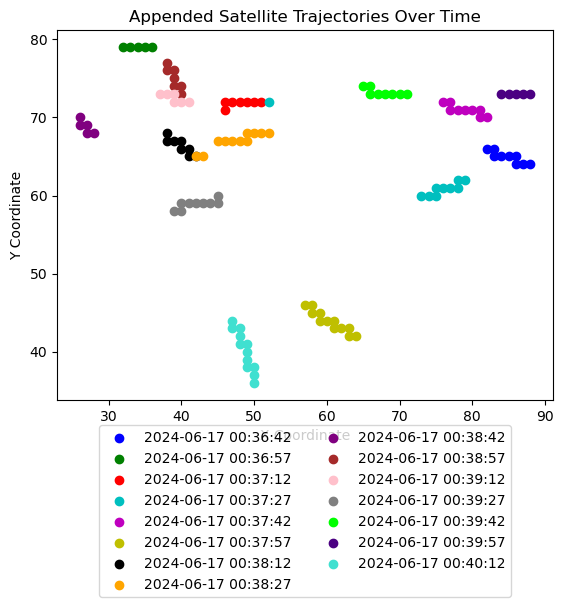

In [7]:
import matplotlib.pyplot as plt

def plot_coordinates_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    current_start_time = None
    coordinates = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'grey', 'lime', 'indigo', 'turquoise']
    color_index = 0

    for line in lines:
        line = line.strip()
        if line.endswith(":"):
            if current_start_time is not None and coordinates:
                y, x = zip(*coordinates)  # Correct the order of coordinates
                plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time)
                color_index += 1

            current_start_time = line[:-1]
            coordinates = []
        elif line:
            coord = tuple(map(int, line.strip('()').split(', ')))
            coordinates.append(coord)

    if current_start_time is not None and coordinates:
        y, x = zip(*coordinates)  # Correct the order of coordinates
        plt.scatter(x, y, color=colors[color_index % len(colors)], label=current_start_time)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Appended Satellite Trajectories Over Time')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.show()

# Plot coordinates from the file
plot_coordinates_from_file('white_pixel_coordinates.txt')


In [16]:
import sys
import os
import numpy as np
import time
sys.path.append(os.path.abspath('E:/SatInView/starlink-grpc-tools-main'))
import starlink_grpc
from datetime import datetime
import matplotlib.pyplot as plt
import csv
from datetime import timedelta
from scipy.ndimage import label

def capture_snr_data(duration_seconds, interval_seconds, context):
    snapshots = []
    end_time = time.time() + duration_seconds

    while time.time() < end_time:
        try:
            snr_data = starlink_grpc.obstruction_map(context)
            snr_data_array = np.array(snr_data, dtype=int)
            snr_data_array[snr_data_array == -1] = 0
            snapshots.append(snr_data_array)
            time.sleep(interval_seconds)
        except starlink_grpc.GrpcError as e:
            print("Failed getting obstruction map data:", str(e))
            break

    return snapshots

def save_white_pixel_coordinates(snapshots, start_time):
    white_pixel_coords = set()  # Use a set to store unique coordinates
    for snr_data in snapshots:
        coords = np.argwhere(snr_data == 1)
        for coord in coords:
            white_pixel_coords.add(tuple(coord))  # Add each coordinate as a tuple to the set

    with open('white_pixel_coordinates.txt', 'a') as f:
        f.write(f"{start_time}:\n")
        for coord in sorted(white_pixel_coords):  # Sort coordinates for consistency
            f.write(f"{coord}\n")
        f.write("\n")

def plot_snr_traces(all_snapshots, start_times, end_times, r):
    plt.figure(figsize=(30, 40))  # Increase the figure size for better resolution
    for i, (snapshots, start_time, end_time) in enumerate(zip(all_snapshots, start_times, end_times)):
        base_image = np.zeros_like(snapshots[0])
        for snr_data in snapshots:
            base_image = np.maximum(base_image, snr_data)

        plt.subplot(r//2+1, 2, i + 1)  # Arrange plots in a grid
        plt.imshow(base_image, cmap='gray', origin='lower')
        plt.title(f'Interval {i+1}\n{start_time} to {end_time} UTC')
        plt.axis('off')

    plt.suptitle('Starlink Obstruction Map Traces (15 intervals of 14 seconds each)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the main title
    plt.show()

def save_white_pixel_coordinates_xor(snapshots, start_time):
    # Parse start_time back to a datetime object
    start_time_dt = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    previous_snr_data = np.zeros_like(snapshots[0][1])
    white_pixel_coords = []

    with open('white_pixel_coordinates_xor.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        i = 0
        for snr_data in snapshots:
            xor_snr_data = np.bitwise_xor(previous_snr_data, snr_data)
            coords = np.argwhere(xor_snr_data == 1)
            if coords.size > 0:
                coord = coords[0]
            elif coords.size == 0:
                coord = np.argwhere(previous_snr_data == 1)[0]

            # Add the timedelta to start_time_dt
            white_pixel_coords.append((start_time_dt + timedelta(seconds=i), tuple(coord)))
            previous_snr_data = snr_data
            i += 1

        for coord in white_pixel_coords:
            writer.writerow([coord[0].strftime("%Y-%m-%d %H:%M:%S"), coord[1][0], coord[1][1]])

def filter_unconnected_white_pixels(snapshots):
    final_snapshot = snapshots[-1]
    labeled_array, num_features = label(final_snapshot)
    connected_pixels = set()
    
    for i in range(1, num_features + 1):
        coords = np.argwhere(labeled_array == i)
        if len(coords) > 1:  # More than one pixel in the component
            for coord in coords:
                connected_pixels.add(tuple(coord))

    filtered_snapshot = np.zeros_like(final_snapshot)
    for coord in connected_pixels:
        filtered_snapshot[coord] = 1

    snapshots[-1] = filtered_snapshot
    return snapshots

def wait_until_target_time():
    target_seconds = {13, 28, 43, 58}
    while True:
        current_second = datetime.utcnow().second
        if current_second in target_seconds:
            break
        time.sleep(0.5)

# Initialize the gRPC context
context = starlink_grpc.ChannelContext(target="192.168.100.1:9200")

all_snapshots = []
start_times = []
end_times = []
r = 2900

for _ in range(r):
    wait_until_target_time()

    starlink_grpc.reset_obstruction_map(context)
    duration_seconds = 14
    interval_seconds = 1  # Capture a snapshot every 1 second

    S = datetime.utcnow() - timedelta(seconds=1)
    start_time= S.strftime("%Y-%m-%d %H:%M:%S")
    snapshots = capture_snr_data(duration_seconds, interval_seconds, context)
    
    # Filter unconnected white pixels in the last snapshot
    snapshots = filter_unconnected_white_pixels(snapshots)
    
    end_time = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

    all_snapshots.append(snapshots)
    start_times.append(start_time)
    end_times.append(end_time)

    # Save white pixel coordinates to a file
    save_white_pixel_coordinates(snapshots, start_time)

    # Save white pixel coordinates with XOR to a CSV file
    save_white_pixel_coordinates_xor(snapshots, start_time)

# Plot all the traces
# plot_snr_traces(all_snapshots, start_times, end_times, r)


IndexError: index 0 is out of bounds for axis 0 with size 0